# Neural Networks

In [58]:
import torch 
from torch import nn

In [59]:
torch.__version__

'2.1.1+cpu'

In [60]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples, noise=0.1, factor=0.2, random_state=42)

In [61]:
len(X), len(y)

(1000, 1000)

In [62]:
print(f"""
      first 2 samples of X: \n{X[:2]}
      first 2 samples of y: \n{y[:2]}""")


      first 2 samples of X: 
[[ 0.13287946  0.12819341]
 [-0.08670428  0.10969125]]
      first 2 samples of y: 
[1 1]


In [63]:
X[1,0]

-0.08670427835872936

         X1        X2  label
0  0.132879  0.128193      1
1 -0.086704  0.109691      1
2 -0.270757  0.268451      1
3 -0.262180  0.077703      1
4  0.454089 -0.890466      0


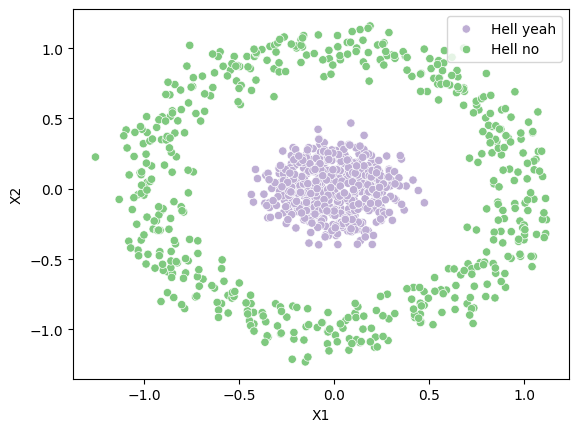

In [64]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0], "X2":X[:,1], 'label':y})
print(circles.head())
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x="X1",y="X2",hue="label",data=circles, palette="Accent", hue_order=[0,1])
plt.legend(labels=['Hell yeah', 'Hell no'], loc='upper right')
plt.show()

In [65]:
circles=circles.reset_index()
circles.head()

,index,X1,X2,label
0,0,0.132879,0.128193,1
1,1,-0.086704,0.109691,1
2,2,-0.270757,0.268451,1
3,3,-0.262180,0.077703,1
4,4,0.454089,-0.890466,0


In [66]:
# Get properties of X,y
def describe(X,y):
    print(f"""
    X's shape: {X.shape}
    y's shape: {y.shape}
    X's type: {X.dtype, type(X)}
    y's type: {y.dtype, type(y)}
    X's min: {X.min()}
    X's max: {X.max()}
    y's min: {y.min()}
    y's max: {y.max()}
    """)

In [67]:
describe(X=X,y=y)


    X's shape: (1000, 2)
    y's shape: (1000,)
    X's type: (dtype('float64'), <class 'numpy.ndarray'>)
    y's type: (dtype('int64'), <class 'numpy.ndarray'>)
    X's min: -1.257778829864198
    X's max: 1.157937973680911
    y's min: 0
    y's max: 1
    


In [68]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [69]:
describe(X,y)


    X's shape: torch.Size([1000, 2])
    y's shape: torch.Size([1000])
    X's type: (torch.float32, <class 'torch.Tensor'>)
    y's type: (torch.float32, <class 'torch.Tensor'>)
    X's min: -1.2577788829803467
    X's max: 1.157938003540039
    y's min: 0.0
    y's max: 1.0
    


In [70]:
# Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=None
                                                    )

In [77]:
describe(X_train, y_train)


    X's shape: torch.Size([800, 2])
    y's shape: torch.Size([800])
    X's type: (torch.float32, <class 'torch.Tensor'>)
    y's type: (torch.float32, <class 'torch.Tensor'>)
    X's min: -1.2577788829803467
    X's max: 1.157938003540039
    y's min: 0.0
    y's max: 1.0
    


In [78]:
describe(X_test, y_test)


    X's shape: torch.Size([200, 2])
    y's shape: torch.Size([200])
    X's type: (torch.float32, <class 'torch.Tensor'>)
    y's type: (torch.float32, <class 'torch.Tensor'>)
    X's min: -1.0873615741729736
    X's max: 1.1179295778274536
    y's min: 0.0
    y's max: 1.0
    


In [71]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [72]:
class CircleModelPrototype(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2  = nn.Linear(in_features=5, out_features=1)
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.layer2(self.layer1(x))

In [74]:
cir_model_30_11_23 = CircleModelPrototype().to(device)
cir_model_30_11_23

CircleModelPrototype(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [75]:
next(cir_model_30_11_23.parameters()).device

device(type='cpu')

In [76]:
cir_model_30_11_23.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.4876, -0.5560],
                      [-0.0821, -0.4824],
                      [ 0.6400, -0.4453],
                      [-0.4976,  0.5598],
                      [ 0.2191,  0.6204]])),
             ('layer1.bias',
              tensor([ 0.0263, -0.3829,  0.4366,  0.1096, -0.6225])),
             ('layer2.weight',
              tensor([[-0.0065,  0.3037, -0.3426,  0.4195, -0.2720]])),
             ('layer2.bias', tensor([0.1294]))])